In [21]:
import matplotlib.pyplot as plt
from neuron import h
print(h.nrnversion())

NEURON -- VERSION 9.0.1 HEAD (b12a541+) 2025-11-14


## Why the letter h?

Originally, NEURON used a language called HOC, created before Python existed.

In HOC scripts, you use commands directly like create soma, insert hh

In Python, h is the handle to the entire HOC namespace.

#### It gives you access to EVERYTHING inside the NEURON simulator.

In [14]:
# Create a soma section
soma=h.Section(name='soma')
soma.L=20
soma.diam=20
soma.insert('hh')

soma

### soma
Soma = cell body,  exists in center of the biological neuron 
The soma in HOC is a section

Meaning:
It is a piece of cable that represents the electrical behavior of the biological soma.



| Biology            | NEURON HOC                                       |
| ------------------ | ------------------------------------------------ |
| Soma (cell body)   | A section named `soma`                           |
| Ion channels       | `insert hh`, `insert pas`, etc.                  |
| Membrane area      | `L` and `diam`                                   |
| AP initiation zone | Where hh is inserted (usually soma/axon hillock) |
| Synaptic inputs    | Objects attached to soma or dendrites            |



In [25]:
# inject current into soma
stim=h.IClamp(soma(0.5))
stim.delay=50  #ms
stim.dur=500  #ms
stim.amp=0.1  #na

| Code                  | Meaning                            |
| --------------------- | ---------------------------------- |
| `h.IClamp(soma(0.5))` | Put an electrode at center of soma |
| `stim.delay = 50`     | Start injecting at 50 ms           |
| `stim.dur = 200`      | Keep injecting for 200 ms          |
| `stim.amp = 0.1`      | Inject 0.1 nanoampere current      |


#### In simulations, we use IClamp to mimic these conditions.

In [26]:
# record voltage and time 
v = h.Vector()     # create vector
v.record(soma(0.5)._ref_v)   # record voltage

t = h.Vector()
t.record(h._ref_t)           # record time


Vector[6]

A Vector in NEURON is like a list that collects data:

v = list of voltages over time

t = list of time points
  record() tells NEURON what value to store at each time step.

It needs the memory address of the variable you want to record.

In NEURON, we get that using _ref_ variables.



h._ref_t means:“Give me a pointer to the simulation time variable.”

Time (ms):     0    0.025   0.05   0.075   0.1   ...  
Voltage (mV): -65   -65     -64    -20     +30   ...


| Code                         | Meaning                            |
| ---------------------------- | ---------------------------------- |
| `v = h.Vector()`             | Create an empty voltage list       |
| `t = h.Vector()`             | Create an empty time list          |
| `v.record(soma(0.5)._ref_v)` | Record voltage from center of soma |
| `t.record(h._ref_t)`         | Record time during simulation      |



In [29]:
# Run simulation

h.tstop = 100
h.run()

0.0

#### sometimes in python 3.10.11 Before using h.tstop or h.run(), load the standard run system: ####


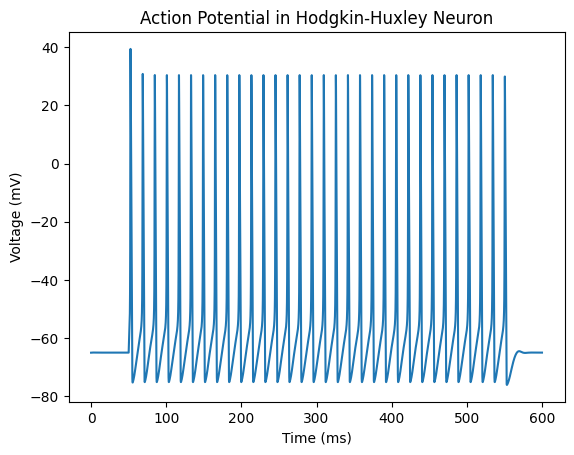

In [28]:
# Plot
plt.plot(t, v)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Action Potential in Hodgkin-Huxley Neuron')
plt.show()